In [25]:
from math import sqrt, fabs
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

plt.xlim(-10, 10), plt.ylim(-10, 10)

class Point(object):
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        
    def __str__(self):
        return "Point(%s,%s)"%(self.x, self.y) 
    
    def normalize(self):
        dist = sqrt(self.x ** 2 + self.y ** 2)
        return Point(self.x/dist, self.y/dist)
    
    def drawPoint(self):
        plt.scatter(self.x, self.y)
    

class Line(object):
    # ax + by + c = 0
    def __init__(self, a, b, c):
        self.a = a;
        self.b = b;
        self.c = c;

    def get_two_infite_points(self):
        if self.a == 0:
            return Point(-1000.0, -self.c/self.b), Point(1000.0, -self.c/self.b);
        if self.b == 0:
            return Point(-self.c/self.a, -1000.0), Point(-self.c/self.a, 1000.0);

        x1 = -1000.0; y1 = - (self.c + self.a * x1) / self.b;
        x2 = 1000.0; y2 = - (self.c + self.a * x2) / self.b;
        return Point(x1, y1), Point(x2, y2);

    def intersect(self, other):
        # Пересечение двух линий
    
        if type(self) != type(other): raise Exception("Two objects must have the same type");

        det = self.a * other.b - self.b * other.a;
        if det == 0:    return None;  ## Parallel

        x = (self.b * other.c - other.b * self.c) / det;
        y = (other.a * self.c - self.a * other.c) / det;

        return Point(x, y);

    def closest_point_to(self, point):
        #ближайщая точка на прямой 
        temp = self.a ** 2 + self.b ** 2;
        bx0 = self.b * point.x;
        ay0 = self.a * point.y;
        x = (self.b * (bx0 - ay0) - self.a * self.c) / temp;
        y = (self.a * (-bx0 + ay0)- self.b * self.c) / temp;
        return Point(x, y);
    
    def normalize(self):
        if self.b != 0:
            m = -self.a/self.b;
            b = -self.c/self.b;
            return [m, b]; 
        else:
            raise Exception("Can't normalize this line");

    def distance_to(self, point):
        return fabs(self.a * point.x + self.b * point.y + self.c ) / sqrt(self.a ** 2 + self.b ** 2);
    
    def drawLine(self, clr='black', lwidth=2, alph=1):
        x1 = 15;
        x2 = -15;
        p = self.normalize(); 
        m = p[0];
        b = p[1];
        y1 = x1 * m + b;
        y2 = x2 * m + b;
        plt.plot((x1, x2), (y1, y2), 'k-', color=clr, linewidth=lwidth, alpha = alph)

    @staticmethod
    def FromPointDir(point, direction):
        if direction.x == 0:
            return Line(1, 0, -point.x);
        elif direction.y == 0:
            return Line(0, 1, -point.y);

        slope = direction.y / direction.x;
        b = -1;
        c = point.y - slope * point.x;
        return Line(slope, b, c);

    @staticmethod
    def FromTwoPoints(p_a, p_b):
        a = p_b.y - p_a.y;
        b = p_a.x - p_b.x;
        c = -(a * p_a.x +b * p_a.y);
        return Line(a, b, c);

class HalfPlane(Line):
    # ax + by + c <= 0
    
    def __init__(self, a, b, c):
        Line.__init__(self, a,b,c);

    def __contains__(self, point):
        return self.a * point.x + self.b * point.y + self.c <= 0.000001;  
    def opposite(self):
        return HalfPlane(self.a * -1.0, self.b * -1.0, self.c * -1.0);

    def intersect(self, other):
        intersection = super(HalfPlane, self).intersect(other);
        if intersection: return intersection;

        if intersection is None:
            # находим точку
            x = None;
            y = None;
            if self.a != 0.0:
                x = 10
                y = (- self.c - self.a * x) / float(self.b) if self.b != 0.0 else 0;
            else:
                y = 10
                x = (- self.c - self.b * y) / float(self.a) if self.a != 0.0 else 0;
            if Point(x,y) in other:
                return Point(x,y)
            else:
                if self.a != 0.0:
                    x = 10
                    y = (- other.c - other.a * x) / float(other.b) if other.b != 0.0 else 0;
                else:
                    y = 10
                    x = (- other.c - other.b * y) / float(other.a) if other.a != 0.0 else 0;
                return Point(x, y)
            
    def getDirection(self):
        return Point(self.a, self.b).normalize(); 
            
    def drawHP(self):
        const = 2.5
        direction = self.getDirection()
        print(direction)
        p = self.get_two_infite_points()
        p0 = Point(p[0].x + direction.x/const, p[0].y + direction.y/const)
        p1 = Point(p[1].x + direction.x/const, p[1].y + direction.y/const)
        l = Line.FromTwoPoints(p0, p1)
        l.drawLine(clr = "gray", lwidth = 9.0, alph = 0.5)
        self.drawLine()
        
    

    @staticmethod
    def FromLineDir(line, direction):
        # На вход линия и вектор направления, на выход - полуплоскость
        point = None;
        if line.b != 0:
            y = - line.c / line.b;
            point = Point(0, y);
        else:
            x = - line.c / line.a;
            point = Point(x, 0);

        shift = Point(point.x + direction.x, point.y + direction.y);

        if line.a * shift.x + line.b * shift.y + line.c <= 0:
            return HalfPlane(line.a, line.b, line.c);
        else:
            return HalfPlane(-line.a, -line.b, -line.c);
        

 


-14 12 -16
Point(-0.7592566023652966,0.6507913734559685)
-7 15 11
Point(-0.42288546533112387,0.9061831399952655)
17 -8 -17
Point(0.9048187022009941,-0.4257970363298796)
-12 8 9
Point(-0.8320502943378437,0.5547001962252291)
-19 -9 8
Point(-0.9037378388935388,-0.42808634473904467)
-14 -10 11
Point(-0.813733471206735,-0.5812381937190965)


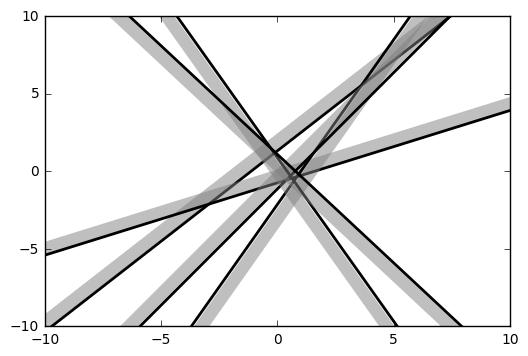

In [26]:
for i in range(6):
    a = random.randrange(-20, 20);
    b = random.randrange(-20, 20);
    if (b == 0):
        b += 1;
    c = random.randrange(-20, 20);
    print(a, b, c);
    HalfPlane(a, b, c).drawHP();
        
plt.show()

Point(-0.7399400733959437,-0.6726727939963124)


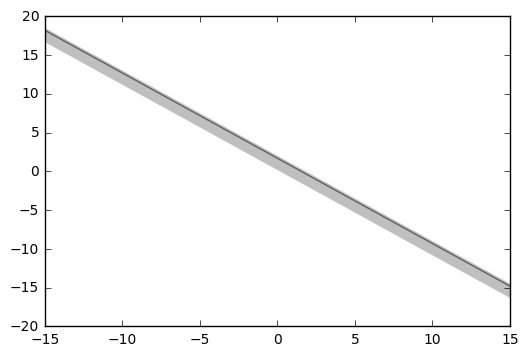

In [22]:

a = -11
b = -10
c = 17
HalfPlane(a, b, c).drawHP();
        
plt.show()